In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

import datetime
from sklearn.model_selection import GridSearchCV

In [3]:
# загрузка данных
data = pd.read_csv('./train_!.csv')
data_test = pd.read_csv('./test_!.csv')

In [ ]:
# описание полей
# client_id - идентификатор клиента
# education - уровень образования
# sex - пол заемщика
# age - возраст заемщика
# car - флаг наличия автомобиля
# car_type - флаг автомобиля иномарки
# deсline_app_cnt - количество отказанных прошлых заявок
# good_work - флаг наличия “хорошей” работы
# bki_request_cnt - количество запросов в БКИ
# home_address - категоризатор домашнего адреса
# work_address - категоризатор рабочего адреса
# income - доход заемщика
# foreign_passport - наличие загранпаспорта
# sna - связь заемщика с клиентами банка
# first_time - давность наличия информации о заемщике
# score_bki - скоринговый балл по данным из БКИ
# region_rating - рейтинг региона
# app_date - дата подачи заявки
# default - флаг дефолта по кредиту

In [4]:
# посмотрим на данные
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


In [5]:
data_test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [6]:
# данные похожи (поля, типы, значения)

In [7]:
# получим больше подробностей
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [ ]:
# видно, что оба дата-сета:
# - имеют те-же поля (кроме target'a в тесте)
# - те-же типы полей
# - имеют пропуски в поле education

In [10]:
# общее кол-во null-ов
data.isna().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [11]:
data_test.isna().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [12]:
# ПРЕДОБРАБОТКА

<AxesSubplot:>

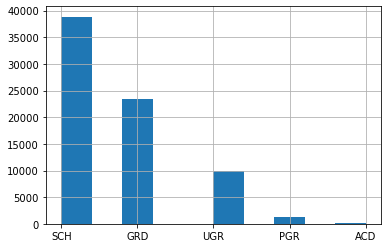

In [13]:
# посмотрим на структуру значений в поле education
# на гистограмме
data.education.hist()

In [14]:
# по значениям
data.education.value_counts(normalize=True)

SCH    0.528765
GRD    0.317926
UGR    0.133566
PGR    0.017104
ACD    0.002640
Name: education, dtype: float64

In [15]:
data_test.education.value_counts(normalize=True)

SCH    0.528996
GRD    0.315192
UGR    0.136326
PGR    0.016806
ACD    0.002681
Name: education, dtype: float64

In [16]:
# видно, что значение "SCH" встречается более чем у половины клиентов, а кол-во пропусков не значительно, 
# по отношению к общему кол-ву, поэтому заменим nan-ы на "SCH"
data.education = data.education.fillna("SCH")
data_test.education = data.education.fillna("SCH")

In [17]:
# преобразуем даты в правильный формат
data["app_date"] = data["app_date"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))
data_test["app_date"] = data_test["app_date"].apply(lambda x: datetime.datetime.strptime(x, '%d%b%Y'))

In [18]:
# найдем минимумы и максимумы в датах
data_app_date_min = data.app_date.min()
data_app_date_max = data.app_date.max()
data_test_app_date_min = data_test.app_date.min()
data_test_app_date_max = data_test.app_date.max()
print ("data.app_date : min, max = %s, %s" % (data_app_date_min, data_app_date_max))
print ("data_test.app_date : min, max = %s, %s" % (data_test_app_date_min, data_test_app_date_max))

data.app_date : min, max = 2014-01-01 00:00:00, 2014-04-30 00:00:00
data_test.app_date : min, max = 2014-01-01 00:00:00, 2014-04-30 00:00:00


In [19]:
# значит, промежуток в подаче заявок был от 2014.01.01 до 2014.04.30
# попробуем создать новую фичу, кол-во дней с подачи заявки.
# в качестве опорного дня возьмем 2014.05.01 (дата обязательно должна быть после 2014.04.30, но не важна)
feature_next_day = datetime.datetime(2014, 5, 1)
data["feature_days_after_app_date"] = (feature_next_day - data["app_date"]).dt.days
data_test["feature_days_after_app_date"] = (feature_next_day - data_test["app_date"]).dt.days

In [20]:
# убедимся что фича создана, значения верны
data[["app_date", "feature_days_after_app_date"]].head()

,app_date,feature_days_after_app_date
0,2014-02-01,89
1,2014-03-12,50
2,2014-02-01,89
3,2014-01-23,98
4,2014-04-18,13


In [21]:
# создадим списки названий полей, по типам
# binary
bin_cols = ["sex", "car", "car_type", "foreign_passport", "good_work"]

# categorical
cat_cols = ["education", "home_address", "work_address", "sna", "first_time"]

# numeric
num_cols = ["age", "decline_app_cnt", "income", "bki_request_cnt", "feature_days_after_app_date", "score_bki", \
            "region_rating"]

In [ ]:
# рассмотрим признаки поподробнее

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


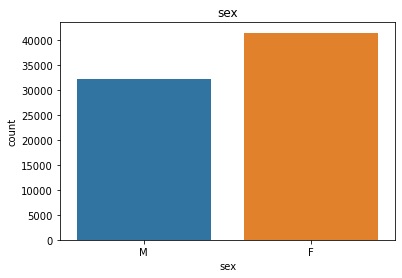

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


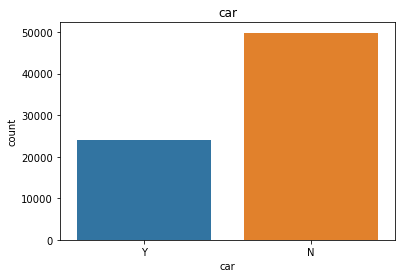

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


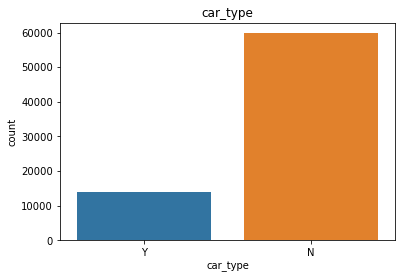

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


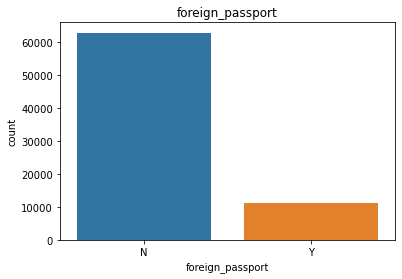

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


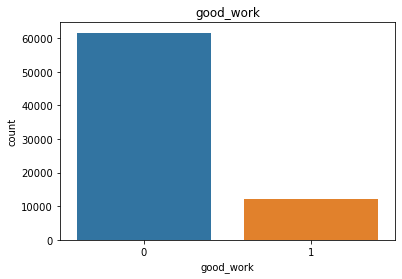

In [23]:
# бинарные признаки в обучающей выборке
for column in bin_cols:
    plt.figure()
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


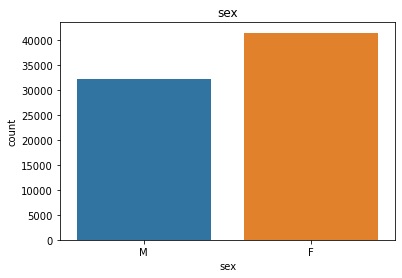

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


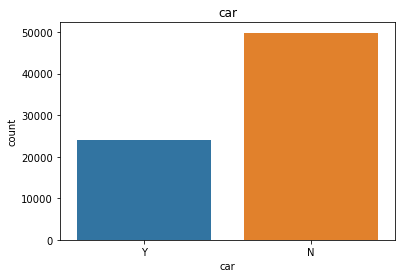

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


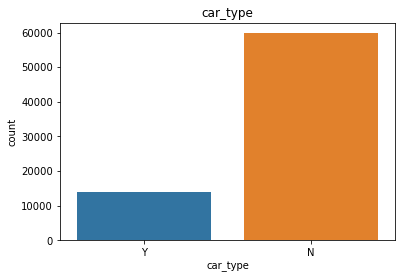

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


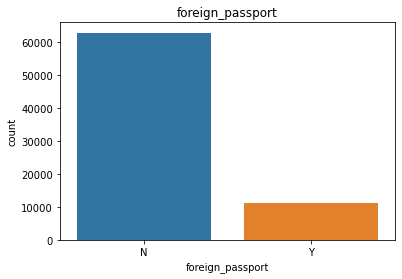

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


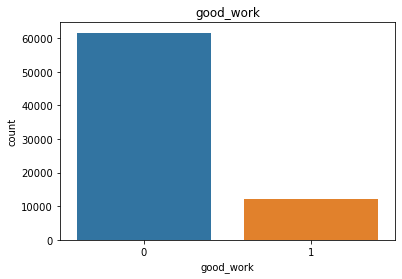

In [24]:
# бинарные признаки в тестовой выборке
for column in bin_cols:
    plt.figure()
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

In [25]:
# судя по графикам:
# - данные распределены относительно равномерно, без больших перекосов
# - отношение признаков схожи и в обучающей и в тестовой выборках
# - чаще всего за кредитами обращаются люди с плохой работой, без автомобиля и загран-паспорта, женщины превалируют над мужчинами

c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


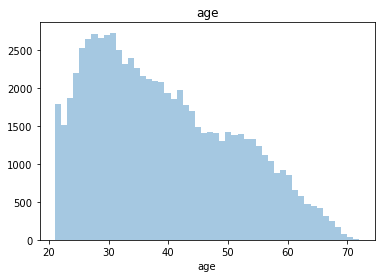

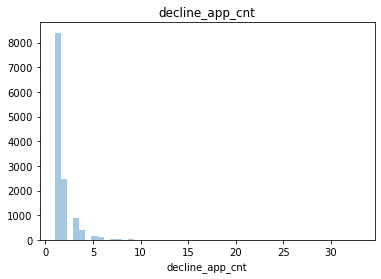

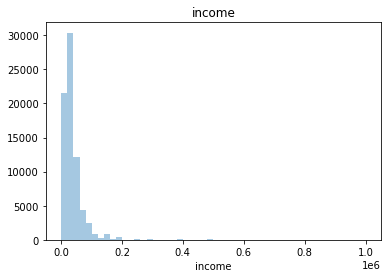

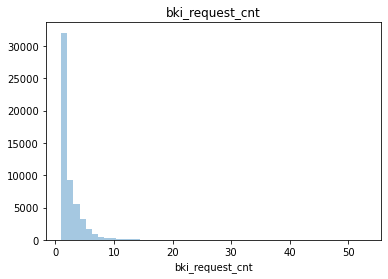

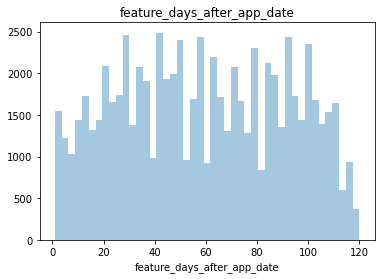

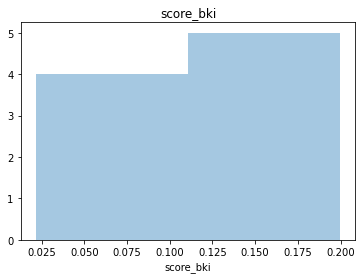

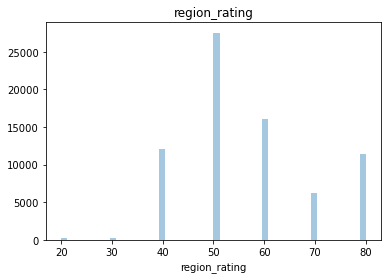

In [26]:
# посмотрим на числовые признаки
for i in num_cols:
    plt.figure()
    sns.distplot(data[i][data[i] > 0], kde = False, rug=False)
    plt.title(i)
    plt.show()

In [27]:
# так-же рассмотрел тестовую выборку, она схожа. не стал приводить, чтоб не заполнять лишним notebook

In [28]:
# часть полей сдвинуто влево, что плохо для дальнейшего обучения
# прологарифмируем сдвинутые поля
for i in ["age", "decline_app_cnt", "income", "bki_request_cnt"]:
    data[i] = np.log(data[i] + 1)
    data_test[i] = np.log(data[i] + 1)

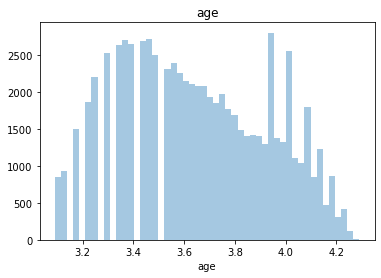

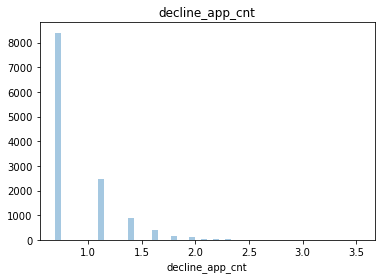

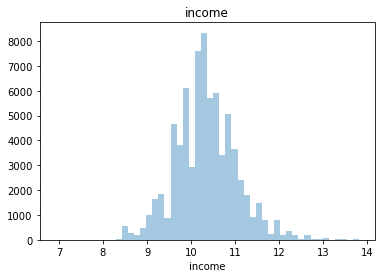

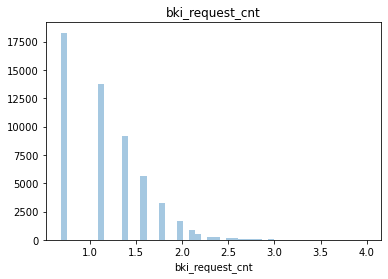

In [29]:
# проверим пролагорифмированные числовые признаки
for i in ["age", "decline_app_cnt", "income", "bki_request_cnt"]:
    plt.figure()
    sns.distplot(data[i][data[i] > 0], kde = False, rug=False)
    plt.title(i)
    plt.show()

In [ ]:
# для полей "decline_app_cnt" и "bki_request_cnt" логарифмирование момогло менее чем ожидалось

<AxesSubplot:>

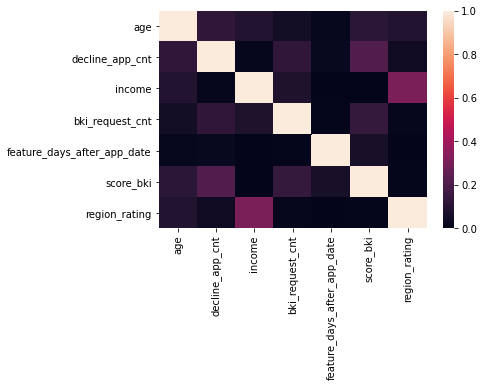

In [31]:
# посмотрим на корреляцию Пирсона
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1)

In [ ]:
# есть небольшая корреляция между income и region_rating
# остальные признаки скоррелированы слабо, что хорошо

<AxesSubplot:>

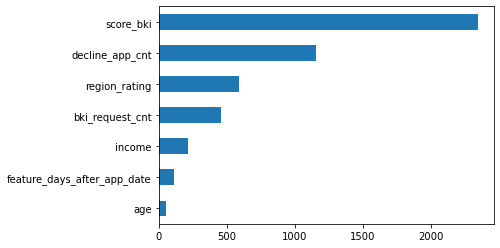

In [32]:
imp_num = pd.Series(f_classif(data[num_cols], data['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [33]:
# важнейшими признаками оаказались score_bki и decline_app_cnt

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


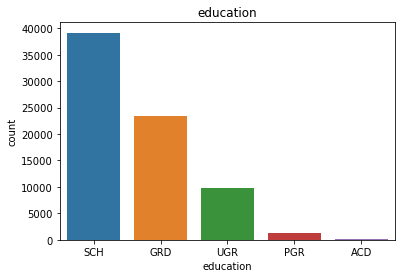

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


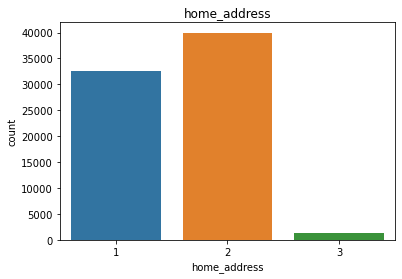

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


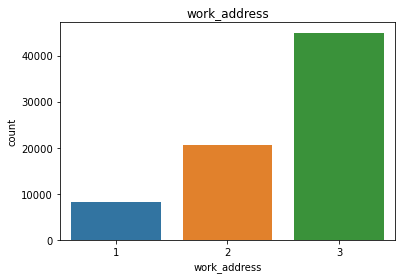

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


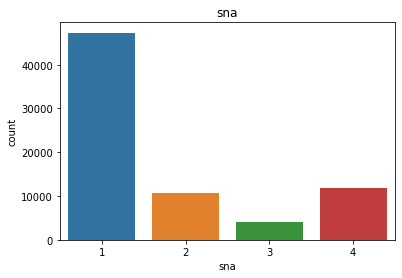

c:\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


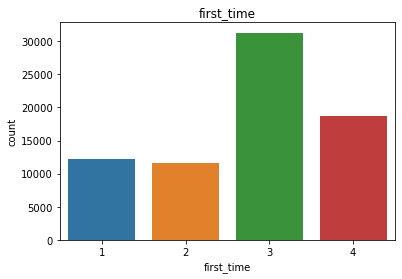

In [34]:
# посмотрим на категориальные признаки
for column in cat_cols:
    plt.figure()
    sns.countplot(data[column])
    plt.title(column)
    plt.show()

In [ ]:
# тестовый сет схож с тренировочным

In [ ]:
# судя по графикам, данные распределены относительно сбаланcированно, но смущает дисбаланс между признаками в 
# sna [1 и 3], и home_address[2 и 3]. в education также есть дисбаланс, но он объясним т.к. минимум у академиков

In [ ]:
# перекодируем признаки

In [35]:
# бинарные
label_encoder = LabelEncoder()
for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    data_test[column] = label_encoder.fit_transform(data_test[column])
    print(column, dict(enumerate(label_encoder.classes_)))

sex {0: 'F', 1: 'M'}
car {0: 'N', 1: 'Y'}
car_type {0: 'N', 1: 'Y'}
foreign_passport {0: 'N', 1: 'Y'}
good_work {0: 0, 1: 1}


In [36]:
# категориальные, только education т.е. остальные уже числовые
label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])
data_test['education'] = label_encoder.fit_transform(data_test['education'])
print(dict(enumerate(label_encoder.classes_)))

{0: 'ACD', 1: 'GRD', 2: 'PGR', 3: 'SCH', 4: 'UGR'}


In [37]:
# убедимся, что категориальные признаки не имеют НЕчисловых значений
for _ in cat_cols:
    print (data[_].unique())

[3 1 4 2 0]
[1 2 3]
[2 3 1]
[4 1 2 3]
[1 4 3 2]


In [ ]:
# попробуем добавить новые фичи

In [38]:
# но сначала удалим не нужные поля
data = data.drop(["client_id", "app_date"], axis = 1)

In [39]:
data["car_ext"] = data.car * 2 - data.car_type
data_test["car_ext"] = data_test.car * 2 - data_test.car_type

data["edu_work"] = data.education * 2 + data.good_work
data_test["edu_work"] = data_test.education * 2 + data_test.good_work

data["edu_car"] = data.education * data.car
data_test["edu_car"] = data_test.education * data_test.car

data["edu_pass_income"] = ((data.education * data.foreign_passport) + data.income) / 5
data_test["edu_pass_income"] = ((data_test.education * data_test.foreign_passport) + data_test.income) / 5

data["bki_sna"] = (data.score_bki / data.sna) + (data.bki_request_cnt * data.feature_days_after_app_date)
data_test["bki_sna"] = (data_test.score_bki / data_test.sna) + (data_test.bki_request_cnt * data_test.feature_days_after_app_date)

In [40]:
data.head()

,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,...,sna,first_time,foreign_passport,default,feature_days_after_app_date,car_ext,edu_work,edu_car,edu_pass_income,bki_sna
0,3,1,4.143135,1,1,0.000000,0,-2.008753,0.693147,50,...,4,1,0,0,89,1,6,3,1.959637,61.187911
1,3,0,4.094345,0,0,0.000000,0,-1.532276,1.386294,50,...,4,1,0,0,50,0,6,0,1.970449,68.931649
2,3,1,3.258097,1,0,1.098612,0,-1.408142,0.693147,80,...,1,4,1,0,89,2,6,3,2.661797,60.281957
3,3,0,3.988984,0,0,0.000000,0,-2.057471,1.098612,50,...,1,3,0,0,98,0,6,0,1.842088,105.606533
4,1,1,3.891820,0,0,0.000000,1,-1.244723,0.693147,60,...,1,4,1,0,13,0,3,0,2.261797,7.766191


c:\python37\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\python37\lib\site-packages\sklearn\metrics\cluster\_supervise

<AxesSubplot:>

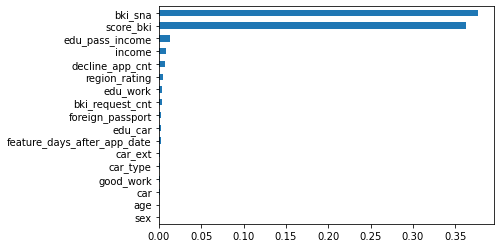

In [41]:
# посмотрим на значимость признаков
# добивим новые признаки в список колонок (для удобства)
num_cols.append('car_ext')
num_cols.append('edu_work')
num_cols.append('edu_car')
num_cols.append('edu_pass_income')
num_cols.append('bki_sna')

imp_cat = pd.Series(mutual_info_classif(data[bin_cols + num_cols], data["default"],
                                     discrete_features=True), index = bin_cols + num_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [ ]:
# пальцем в небо!

In [ ]:
# подготовка к обучению

In [42]:
# создадим новые колонки для категориальных призаков
X_cat = OneHotEncoder(sparse = False).fit_transform(data[cat_cols].values)
Y_cat = OneHotEncoder(sparse = False).fit_transform(data_test[cat_cols].values)

In [43]:
# стандартизация
X_num = StandardScaler().fit_transform(data[num_cols].values)
Y_num = StandardScaler().fit_transform(data_test[num_cols].values)

In [44]:
# Объединяем

X = np.hstack([X_num, data[bin_cols].values, X_cat])
Y = data["default"].values

X_test = np.hstack([Y_num, data_test[bin_cols].values, Y_cat])
id_ = data_test['client_id']

In [45]:
# поделим на обучающую и валидационную
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.20, random_state=42)

In [46]:
# попробуем поиграться с гипер-парамаетрами
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 6, 15)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, i

c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_ms

c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 444, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\python37\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details

Лучшее Penalty: l2
Лучшее C: 1.0


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
# что-то пошло не так!
# ни один из вариантов подбора значений в параметре регуляции не дал лучшее C чем 1
# в обучении попробую установить вручную, посмотреть какие C будут лучше

In [ ]:
# ОБУЧЕНИЕ

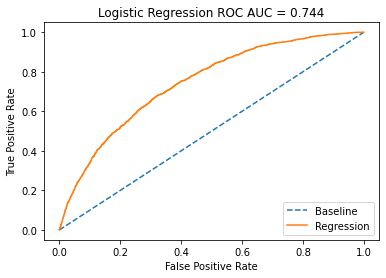

In [49]:
# обучим моель на обучающей выборке
model = LogisticRegression(penalty="l2", \
                           C=7, \
                           fit_intercept=True, \
                           intercept_scaling=1, \
                           class_weight="balanced", \
                           solver="liblinear", \
                           max_iter=2000, \
                           multi_class="auto")

model.fit(X_train, y_train)

Y_pred = model.predict(X_valid)
Y_pred_prob = model.predict_proba(X_valid)[:,1]

y_pred_test = model.predict(X_test)
y_pred_prob_test = model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_valid, Y_pred_prob)
roc_auc = roc_auc_score(y_valid, Y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [50]:
confusion_matrix(y_valid, Y_pred)

array([[8677, 4256],
       [ 577, 1250]], dtype=int64)

In [51]:
# новая модель на всех данных
model2 = LogisticRegression(penalty="l2", \
                           C=7, \
                           fit_intercept=True, \
                           intercept_scaling=1, \
                           class_weight="balanced", \
                           solver="liblinear", \
                           max_iter=2000, \
                           multi_class="auto")
model2.fit(X, Y)

LogisticRegression(C=7, class_weight='balanced', max_iter=2000,
                   solver='liblinear')

In [52]:
y_pred_test = model2.predict(X_test)
y_pred_prob_test = model2.predict_proba(X_test)[:,1]

In [53]:
# создадим свой submission
submission = pd.DataFrame({'client_id': id_, "default": y_pred_prob_test})
submission.to_csv('submission.csv', index=False)
submission.head()

,client_id,default
0,74835,0.238047
1,17527,0.657014
2,75683,0.483908
3,26883,0.455914
4,28862,0.177968
